In [1]:
import os
import sys

import pandas as pd
import geopandas as gpd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

module_path = os.path.abspath(os.path.join('../'))
if module_path not in sys.path:
    sys.path.append(module_path)
    import aup

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.10.3-CAPI-1.16.1) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  warnings.warn(


2023-06-08 19:27:11 Configured OSMnx 1.1.2
2023-06-08 19:27:11 HTTP response caching is on


In [2]:
ndmi_tij_8 = pd.read_csv('/home/jovyan/accesibilidad-urbana/data/raw/ndmi_tijuana_res8_date.csv')
ndmi_tij_8.head(2)

,Unnamed: 0,hex_id,res,ndmi,month,year,city,daymonthyear,date
0,29565,8848593631fffff,8,-0.161526,1,2022,Tijuana,01/1/2022,2022-01-01
1,29595,8829a4d0edfffff,8,-0.109512,1,2022,Tijuana,01/1/2022,2022-01-01


In [3]:
tij_hex8 = gpd.read_file('/home/jovyan/accesibilidad-urbana/data/raw/hexgrid_8_tij.geojson')
tij_hex8.head(2)

,hex_id_8,CVEGEO,metropolis,geometry
0,884859adc9fffff,02003,Tijuana,"POLYGON ((-116.53634 32.36989, -116.53176 32.3..."
1,884859a84bfffff,02003,Tijuana,"POLYGON ((-116.39385 32.24135, -116.39500 32.2..."


In [4]:
tij_hex8_ndmi = ndmi_tij_8.merge(tij_hex8, left_on= "hex_id", right_on="hex_id_8")
tij_hex8_ndmi.head(5)

,Unnamed: 0,hex_id,res,ndmi,month,year,city,daymonthyear,date,hex_id_8,CVEGEO,metropolis,geometry
0,29565,8848593631fffff,8,-0.161526,1,2022,Tijuana,01/1/2022,2022-01-01,8848593631fffff,02003,Tijuana,"POLYGON ((-116.58375 32.48140, -116.58833 32.4..."
1,30145,8848593631fffff,8,-0.073401,3,2022,Tijuana,01/3/2022,2022-03-01,8848593631fffff,02003,Tijuana,"POLYGON ((-116.58375 32.48140, -116.58833 32.4..."
2,30894,8848593631fffff,8,-0.047421,2,2022,Tijuana,01/2/2022,2022-02-01,8848593631fffff,02003,Tijuana,"POLYGON ((-116.58375 32.48140, -116.58833 32.4..."
3,31452,8848593631fffff,8,-0.090789,4,2022,Tijuana,01/4/2022,2022-04-01,8848593631fffff,02003,Tijuana,"POLYGON ((-116.58375 32.48140, -116.58833 32.4..."
4,32070,8848593631fffff,8,-0.108176,5,2022,Tijuana,01/5/2022,2022-05-01,8848593631fffff,02003,Tijuana,"POLYGON ((-116.58375 32.48140, -116.58833 32.4..."


## Data treatment 

### Convert to datetime format

In [5]:
tij_hex8_ndmi['daymonthyear'] = pd.to_datetime(tij_hex8_ndmi['daymonthyear'], format='%d/%m/%Y')
pd.DatetimeIndex(tij_hex8_ndmi['daymonthyear']).year

Int64Index([2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022,
            ...
            2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022],
           dtype='int64', name='daymonthyear', length=7416)

### Convert to format mmddyyyy

In [6]:
tij_hex8_ndmi['daymonthyear'] = pd.to_datetime(tij_hex8_ndmi['daymonthyear'], format='%d%m%Y').dt.strftime('%m%d%Y')
tij_hex8_ndmi.head(5)

,Unnamed: 0,hex_id,res,ndmi,month,year,city,daymonthyear,date,hex_id_8,CVEGEO,metropolis,geometry
0,29565,8848593631fffff,8,-0.161526,1,2022,Tijuana,01012022,2022-01-01,8848593631fffff,02003,Tijuana,"POLYGON ((-116.58375 32.48140, -116.58833 32.4..."
1,30145,8848593631fffff,8,-0.073401,3,2022,Tijuana,03012022,2022-03-01,8848593631fffff,02003,Tijuana,"POLYGON ((-116.58375 32.48140, -116.58833 32.4..."
2,30894,8848593631fffff,8,-0.047421,2,2022,Tijuana,02012022,2022-02-01,8848593631fffff,02003,Tijuana,"POLYGON ((-116.58375 32.48140, -116.58833 32.4..."
3,31452,8848593631fffff,8,-0.090789,4,2022,Tijuana,04012022,2022-04-01,8848593631fffff,02003,Tijuana,"POLYGON ((-116.58375 32.48140, -116.58833 32.4..."
4,32070,8848593631fffff,8,-0.108176,5,2022,Tijuana,05012022,2022-05-01,8848593631fffff,02003,Tijuana,"POLYGON ((-116.58375 32.48140, -116.58833 32.4..."


In [7]:
tij_hex8_ndmi['daymonthyear'] = tij_hex8_ndmi['daymonthyear'].astype('int64')
tij_hex8_ndmi.head(2)

,Unnamed: 0,hex_id,res,ndmi,month,year,city,daymonthyear,date,hex_id_8,CVEGEO,metropolis,geometry
0,29565,8848593631fffff,8,-0.161526,1,2022,Tijuana,1012022,2022-01-01,8848593631fffff,02003,Tijuana,"POLYGON ((-116.58375 32.48140, -116.58833 32.4..."
1,30145,8848593631fffff,8,-0.073401,3,2022,Tijuana,3012022,2022-03-01,8848593631fffff,02003,Tijuana,"POLYGON ((-116.58375 32.48140, -116.58833 32.4..."


### Convert to format dd / mm / yyyy

In [68]:
tij_hex8_ndmi['daymonthyear'] = pd.to_datetime(tij_hex8_ndmi['daymonthyear'], format='%m%d%Y').dt.strftime('%d/%m/%Y')
tij_hex8_ndmi.head(5)

,Unnamed: 0,hex_id,res,ndmi,month,year,city,daymonthyear,date,hex_id_8,CVEGEO,metropolis,geometry
0,29565,8848593631fffff,8,-0.161526,1,2022,Tijuana,01/01/2022,2022-01-01,8848593631fffff,02003,Tijuana,"POLYGON ((-116.58375 32.48140, -116.58833 32.4..."
1,30145,8848593631fffff,8,-0.073401,3,2022,Tijuana,01/03/2022,2022-03-01,8848593631fffff,02003,Tijuana,"POLYGON ((-116.58375 32.48140, -116.58833 32.4..."
2,30894,8848593631fffff,8,-0.047421,2,2022,Tijuana,01/02/2022,2022-02-01,8848593631fffff,02003,Tijuana,"POLYGON ((-116.58375 32.48140, -116.58833 32.4..."
3,31452,8848593631fffff,8,-0.090789,4,2022,Tijuana,01/04/2022,2022-04-01,8848593631fffff,02003,Tijuana,"POLYGON ((-116.58375 32.48140, -116.58833 32.4..."
4,32070,8848593631fffff,8,-0.108176,5,2022,Tijuana,01/05/2022,2022-05-01,8848593631fffff,02003,Tijuana,"POLYGON ((-116.58375 32.48140, -116.58833 32.4..."


In [10]:
tij_hex8_ndmi['daymonthyear'] = tij_hex8_ndmi['daymonthyear'].astype(str)
tij_hex8_ndmi.head(5)

,Unnamed: 0,hex_id,res,ndmi,month,year,city,daymonthyear,date,hex_id_8,CVEGEO,metropolis,geometry
0,29565,8848593631fffff,8,-0.161526,1,2022,Tijuana,1012022,2022-01-01,8848593631fffff,02003,Tijuana,"POLYGON ((-116.58375 32.48140, -116.58833 32.4..."
1,30145,8848593631fffff,8,-0.073401,3,2022,Tijuana,3012022,2022-03-01,8848593631fffff,02003,Tijuana,"POLYGON ((-116.58375 32.48140, -116.58833 32.4..."
2,30894,8848593631fffff,8,-0.047421,2,2022,Tijuana,2012022,2022-02-01,8848593631fffff,02003,Tijuana,"POLYGON ((-116.58375 32.48140, -116.58833 32.4..."
3,31452,8848593631fffff,8,-0.090789,4,2022,Tijuana,4012022,2022-04-01,8848593631fffff,02003,Tijuana,"POLYGON ((-116.58375 32.48140, -116.58833 32.4..."
4,32070,8848593631fffff,8,-0.108176,5,2022,Tijuana,5012022,2022-05-01,8848593631fffff,02003,Tijuana,"POLYGON ((-116.58375 32.48140, -116.58833 32.4..."


<AxesSubplot:>

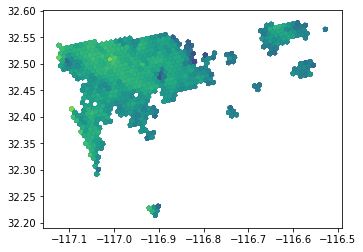

In [8]:
gdftij_hex8_ndmi = gpd.GeoDataFrame(tij_hex8_ndmi, geometry="geometry")
gdftij_hex8_ndmi.plot('ndmi')

In [9]:
gdftij_hex8_ndmi.to_file("/home/jovyan/accesibilidad-urbana/output/tij_ndmi_hex8.geojson", driver='GeoJSON')